In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/"


'Colab Notebooks'   lung_image_sets


In [ ]:
import os
import pandas as pd


data_dir = "/content/drive/My Drive/lung_image_sets"

classes=os.listdir(data_dir)

print(classes)




['lung_n', 'lung_aca', 'lung_scc']


In [ ]:
import tensorflow as tf

data_dir = '/content/drive/My Drive/lung_image_sets'


batch_size = 32
img_height = 224
img_width = 224

#Creating the train dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

#Creating the validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

#Creating the test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.0,  # No validation split for test dataset
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 1500 files belonging to 3 classes.
Using 1200 files for training.
Found 1500 files belonging to 3 classes.
Using 300 files for validation.
Found 1500 files belonging to 3 classes.


TRAINING DATASET


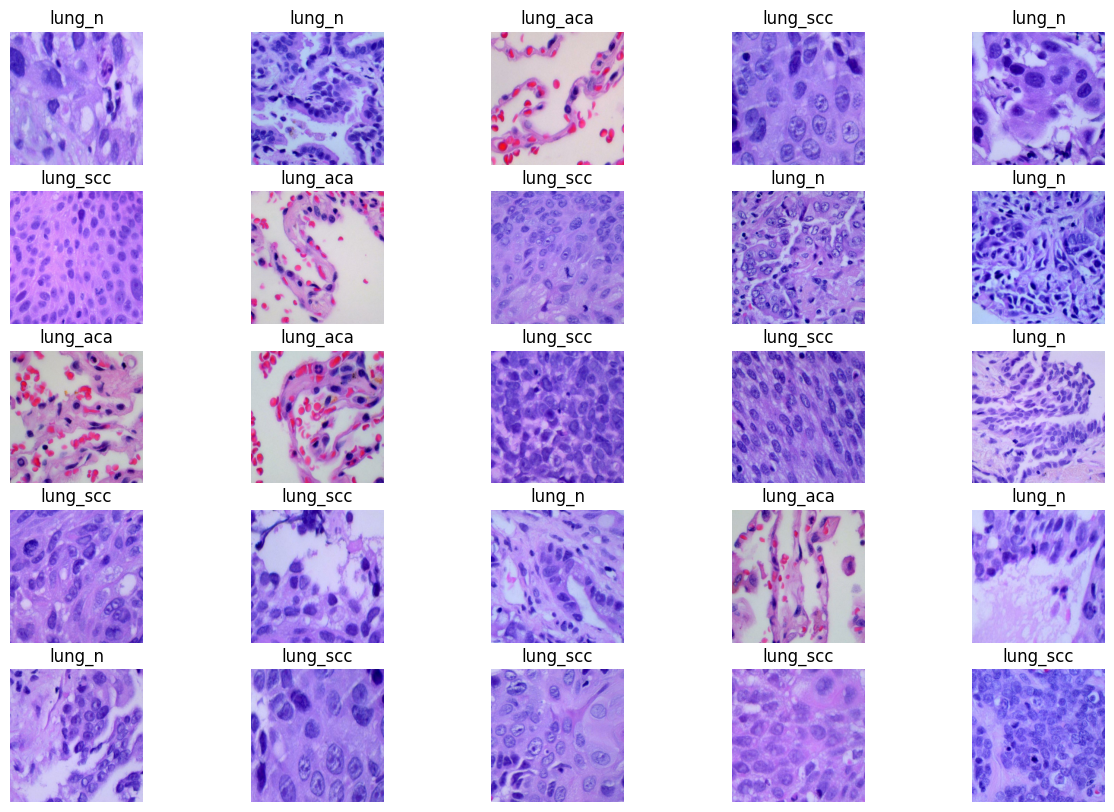

VALIDATTION DATASET


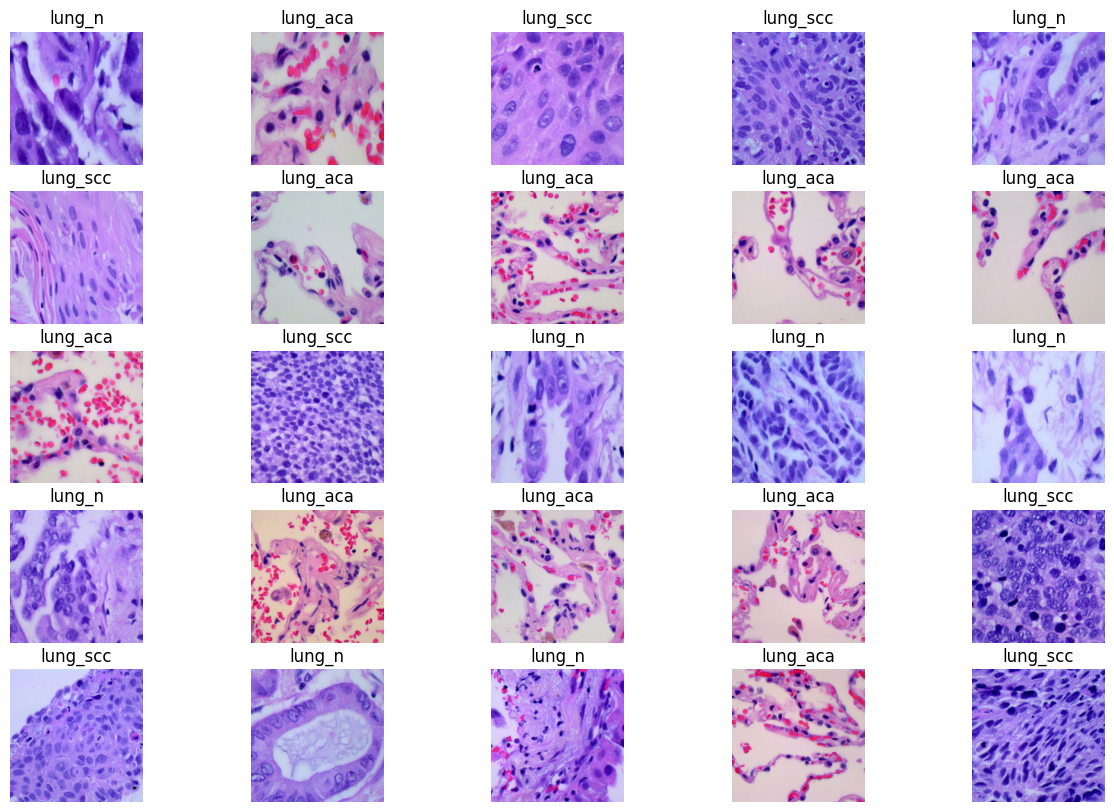

TEST DATASET


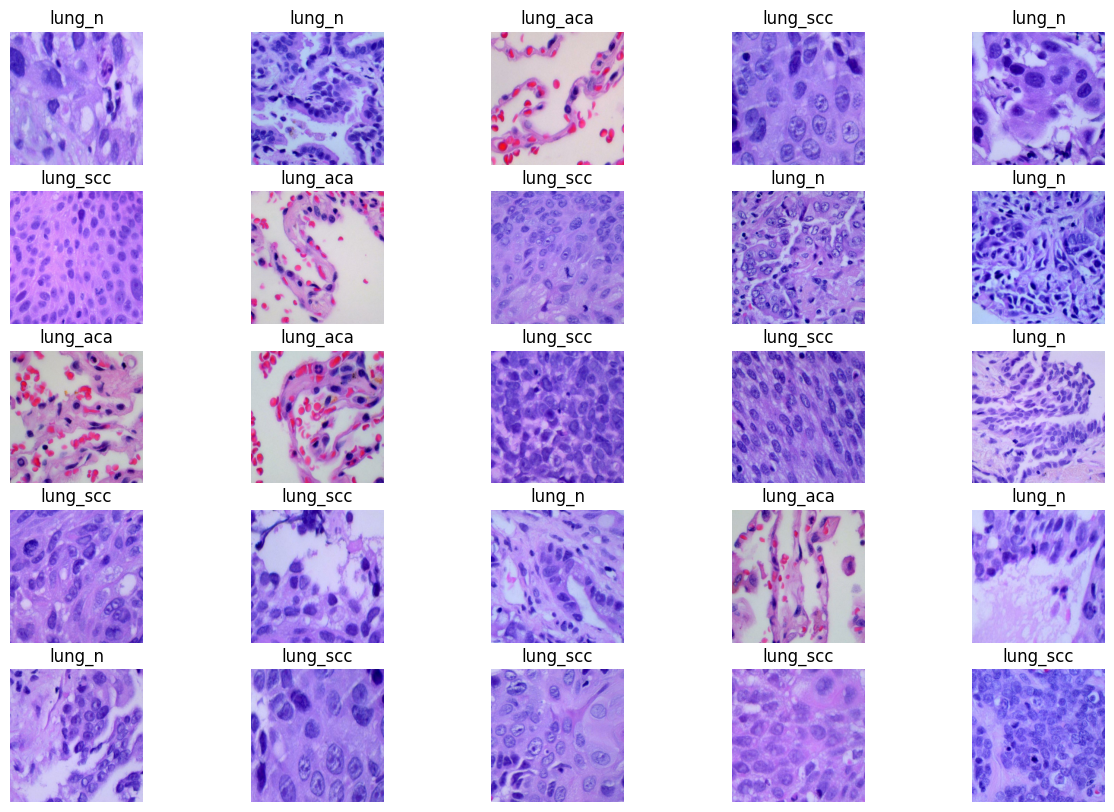

In [ ]:
import matplotlib.pyplot as plt

#Defining a function to visualize images and labels from a dataset batch
def visualize_dataset(dataset_batch):
    #Extracting images and labels from the dataset batch
    images, labels = dataset_batch

    plt.figure(figsize=(15, 10))
    for i in range(25):
        plt.subplot(5,5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])

        plt.axis("off")
    plt.show()


print("TRAINING DATASET")
visualize_dataset(next(iter(train_ds)))
print("VALIDATTION DATASET")
visualize_dataset(next(iter(val_ds)))
print("TEST DATASET")
visualize_dataset(next(iter(test_ds)))


CREATING THE MODEL

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
num_classes=len(classes)
num_classes

3

In [ ]:
#Iterating over the dataset to extract class names
class_names = []

for images, labels in val_ds:
    class_names.extend(labels.numpy())


class_names = set(class_names)

print("Class names:", class_names)


Class names: {0, 1, 2}


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

#Creating the CNN Sequential model
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(num_classes, activation='softmax')
])

#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [ ]:
num_epochs = 20

#Training the model
history = model.fit(train_ds, epochs=num_epochs, verbose=1, validation_data=val_ds, shuffle=False)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


38/38 [==============================] - 112s 3s/step - loss: 0.8219 - accuracy: 0.5667 - val_loss: 0.5586 - val_accuracy: 0.6433
Epoch 2/20
38/38 [==============================] - 90s 2s/step - loss: 0.6136 - accuracy: 0.6650 - val_loss: 0.5440 - val_accuracy: 0.7033
Epoch 3/20
38/38 [==============================] - 100s 3s/step - loss: 0.5734 - accuracy: 0.6325 - val_loss: 0.5304 - val_accuracy: 0.6933
Epoch 4/20
38/38 [==============================] - 87s 2s/step - loss: 0.5540 - accuracy: 0.6775 - val_loss: 0.5712 - val_accuracy: 0.7400
Epoch 5/20
38/38 [==============================] - 89s 2s/step - loss: 0.5416 - accuracy: 0.6700 - val_loss: 0.4984 - val_accuracy: 0.7000
Epoch 6/20
38/38 [==============================] - 94s 2s/step - loss: 0.5022 - accuracy: 0.7183 - val_loss: 0.4702 - val_accuracy: 0.7067
Epoch 7/20
38/38 [==============================] - 90s 2s/step - loss: 0.6666 - accuracy: 0.6525 - val_loss: 0.5311 - val_accuracy: 0.6733
Epoch 8/20
38/38 [===========

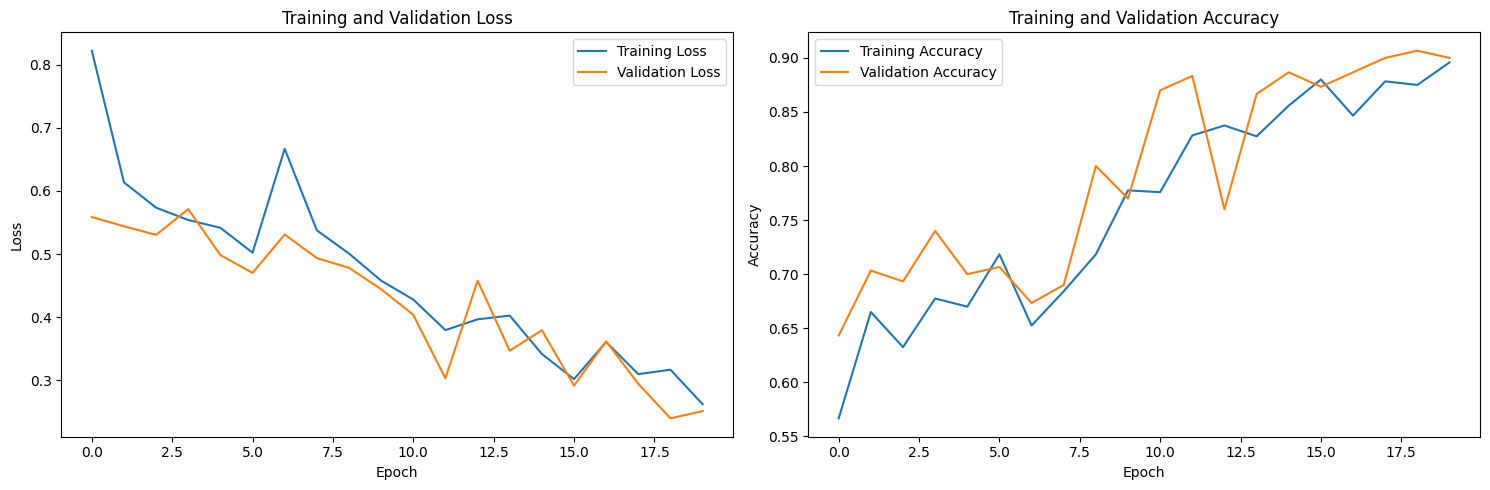

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#Plotting the training and validation loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].legend()

#Plotting training and validation accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training and Validation Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
#Evaluating the model
test_loss, test_accuracy = model.evaluate(test_ds)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


47/47 [==============================] - 38s 769ms/step - loss: 0.2163 - accuracy: 0.9107
Test Loss: 0.21626800298690796
Test Accuracy: 0.9106666445732117


47/47 [==============================] - 42s 867ms/step


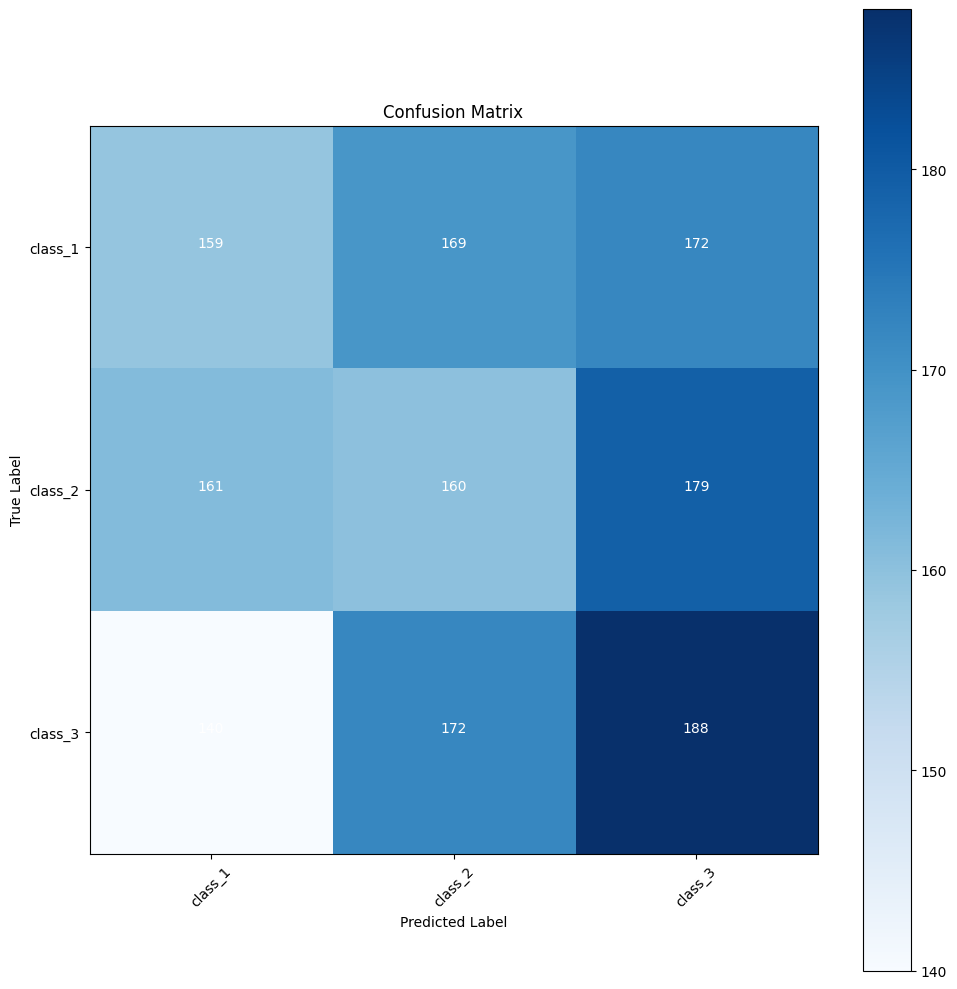

In [ ]:
#Creating a Confusion Matrix

import numpy as np
from sklearn.metrics import confusion_matrix
import itertools


#Defining the class indices manually based on the classes of my dataset
class_indices = {'class_1': 0, 'class_2': 1, 'class_3': 2}

#Getting the predicted labels for the test dataset
y_pred = np.argmax(model.predict(test_ds), axis=-1)

#Getting the true labels for the test dataset
y_true = np.concatenate([y for x, y in test_ds], axis=0)

#Calculating the confusion matrix
cm = confusion_matrix(y_true, y_pred)

classes = list(class_indices.keys())

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()
